#Análisis exploratorio con técnicas de agrupamiento
###Karla González Sánchez | A01541526

In [68]:
import pandas as pd
import random
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
!pip install MiniSom
from minisom import MiniSom

#Problema

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/Country-data.csv')

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### 1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos.
Utiliza al menos dos métodos para estimar el número óptimo de grupos.

###Elbow Method

In [ ]:
cluster = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

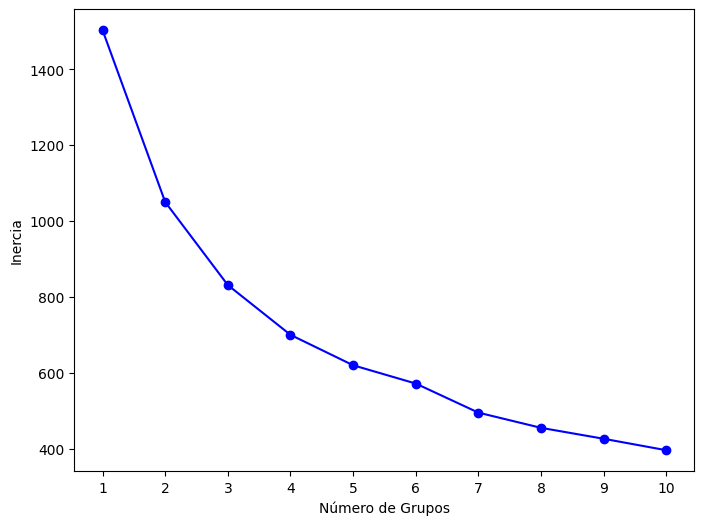

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Grupos')
plt.ylabel('Inercia')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
optimal_num_clusters = 3
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(scaled_data)
df['cluster'] = kmeans.labels_

print(df[['country', 'cluster']])

                 country  cluster
0            Afghanistan        1
1                Albania        2
2                Algeria        2
3                 Angola        1
4    Antigua and Barbuda        2
..                   ...      ...
162              Vanuatu        2
163            Venezuela        2
164              Vietnam        2
165                Yemen        1
166               Zambia        1

[167 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###Silhouette Method

In [ ]:
columns_to_cluster = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_to_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

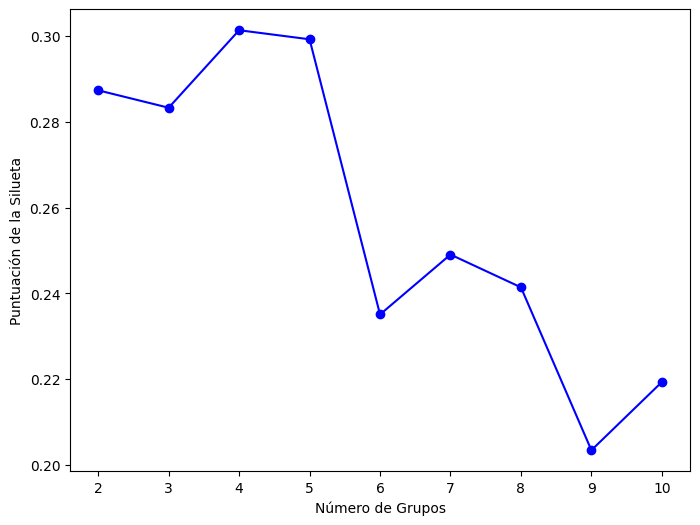

                 country  cluster
0            Afghanistan        1
1                Albania        0
2                Algeria        0
3                 Angola        1
4    Antigua and Barbuda        0
..                   ...      ...
162              Vanuatu        0
163            Venezuela        0
164              Vietnam        0
165                Yemen        1
166               Zambia        1

[167 rows x 2 columns]


In [ ]:
silhouette_scores = []

#Probar diferentes números de grupos
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

#Número óptimo de grupos basado en la puntuación de la silueta máxima
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

#Ajuste del modelo K-Means con el número óptimo de grupos
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

#Etiquetas de grupos al DataFrame original
df['cluster'] = cluster_labels

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Grupos')
plt.ylabel('Puntuación de la Silueta')
plt.xticks(range(2, 11))
plt.show()

print(df[['country', 'cluster']])

### 2. Repita lo anterior, pero con otro método de agrupamiento que elijas.


###Agrupamiento jerárquico

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


                 country  cluster
0            Afghanistan        2
1                Albania        1
2                Algeria        1
3                 Angola        1
4    Antigua and Barbuda        1
..                   ...      ...
162              Vanuatu        1
163            Venezuela        1
164              Vietnam        1
165                Yemen        1
166               Zambia        2

[167 rows x 2 columns]


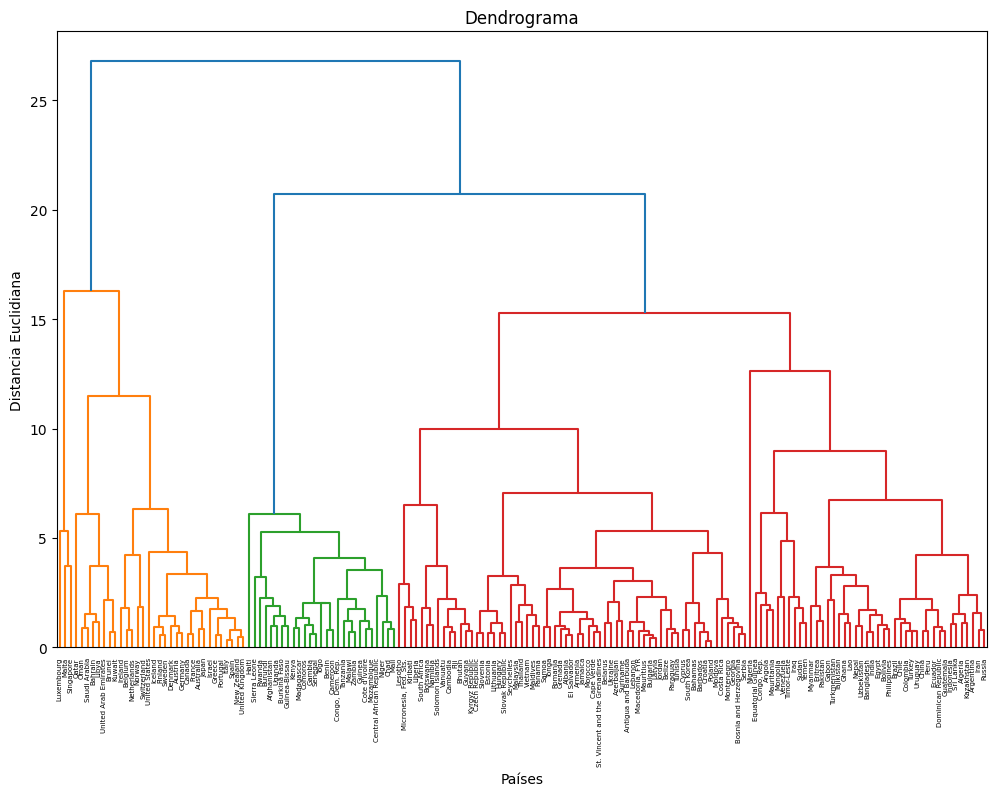

In [ ]:
plt.figure(figsize=(12, 8))

agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = agg_clustering.fit_predict(scaled_data)

dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'), labels=df['country'].values, leaf_rotation=90)
plt.title('Dendrograma')
plt.xlabel('Países')
plt.ylabel('Distancia Euclidiana')

df['cluster'] = cluster_labels

print(df[['country', 'cluster']])

### 3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio.

###Minisom

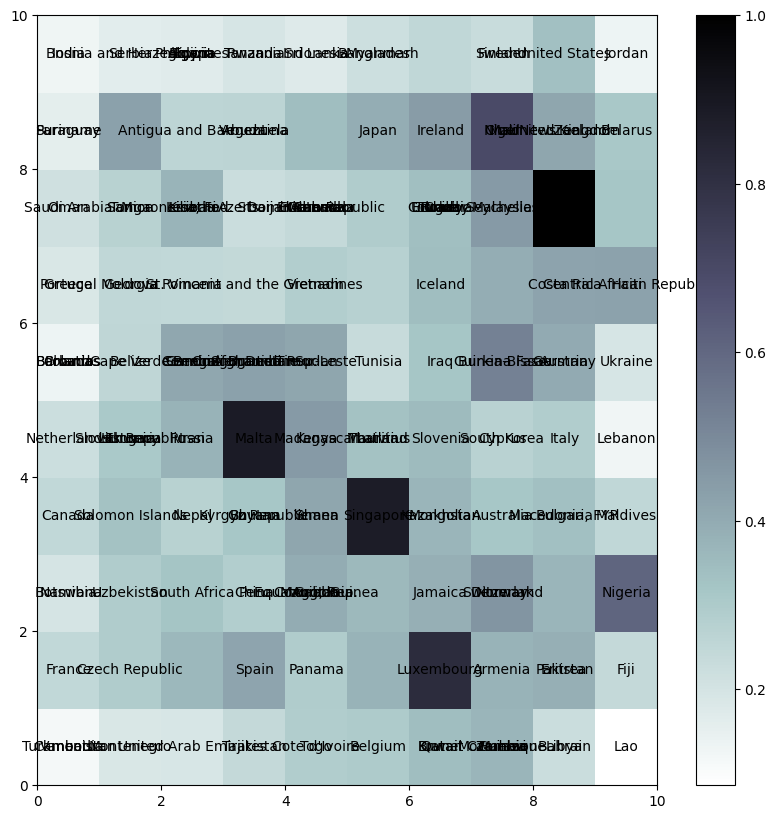

In [90]:
map_size = (10, 10)

som = MiniSom(map_size[0], map_size[1], scaled_data.shape[1], sigma=0.5, learning_rate=0.5)

som.random_weights_init(scaled_data)

num_epochs = 100
som.train(scaled_data, num_epochs)

country_names = df['country'].tolist()

import matplotlib.pyplot as plt

plt.figure(figsize=(map_size[0], map_size[1]))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

for i, x in enumerate(scaled_data):
    winning_unit = som.winner(x)
    plt.text(winning_unit[0]+0.5, winning_unit[1]+0.5, country_names[i], fontsize=10, ha='center', va='center')

plt.show()

### 4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

In [93]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

df['cluster'] = cluster_labels

clustered_countries = df.groupby('cluster')['country'].unique()

for cluster_id, countries in clustered_countries.items():
    print(f"Cluster {cluster_id}: {', '.join(countries)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: Botswana, Kiribati, Lesotho, Liberia, Micronesia, Fed. Sts., Moldova, Namibia, Solomon Islands, South Africa
Cluster 1: Afghanistan, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Cote d'Ivoire, Gambia, Guinea, Guinea-Bissau, Haiti, Kenya, Madagascar, Malawi, Mali, Mozambique, Niger, Rwanda, Senegal, Sierra Leone, Tanzania, Togo, Uganda, Zambia
Cluster 2: Belarus, Belize, Bhutan, Cambodia, Cape Verde, Estonia, Fiji, Guyana, Hungary, Jordan, Kyrgyz Republic, Lithuania, Malaysia, Maldives, Mauritius, Panama, Paraguay, Seychelles, Slovak Republic, Thailand, Tunisia, Turkmenistan, Vanuatu, Vietnam
Cluster 3: Albania, Antigua and Barbuda, Bahamas, Barbados, Bosnia and Herzegovina, Bulgaria, Chile, Costa Rica, Croatia, Cyprus, Czech Republic, Georgia, Latvia, Lebanon, Macedonia, FYR, Montenegro, Poland, Serbia, Slovenia, South Korea, Ukraine, Uruguay
Cluster 4: Angola, Congo, Rep., Equatorial Guinea, Eritrea, Gabon, Ghana, Iraq, 

Los clústeres obtenidos en gran medida siguen patrones esperados en términos de desarrollo económico y social, agrupando países con características similares.

Por ejemplo, el cluster 5 está formado por países pequeños y desarrollados, como Luxemburgo, Malta y Singapur, que muestran indicadores socioeconómicos muy altos.

El cluster 8 está compuesto por países altamente desarrollados, principalmente de Europa Occidental y América del Norte. Incluye países como Estados Unidos, Reino Unido, Alemania y Francia.

Y así sucesivamente, por lo que estos patrones tienen sentido y entre estos países tienen algo en común.